# A Quick Introduction to Numerical Data Manipulation with Python and NumPy

In [1]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-03-19 15:57:33.821432


## What is NumPy?

[NumPy](https://numpy.org/doc/stable/index.html) stands for numerical Python. It's the backbone of all kinds of scientific and numerical computing in Python.

And since machine learning is all about turning data into numbers and then figuring out the patterns, NumPy often comes into play.

<img src="../images/numpy-6-step-ml-framework-tools-numpy-highlight.png" alt="a 6 step machine learning framework along will tools you can use for each step" width="700"/>

## Why NumPy?

You can do numerical calculations using pure Python. In the beginning, you might think Python is fast, but once your data gets large, you'll start to notice slow-downs.

One of the main reasons you use NumPy is because it's fast. Behind the scenes, the code has been optimized to run using C. Which is another programming language, which can do things much faster than Python.

The benefit of this being behind the scenes is you don't need to know any C to take advantage of it. You can write your numerical computations in Python using NumPy and get the added speed benefits.

If your curious as to what causes this speed benefit, it's a process called vectorization. [Vectorization](https://en.wikipedia.org/wiki/Vectorization) aims to do calculations by avoiding loops as loops can create potential bottlenecks.

NumPy achieves vectorization through a process called [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html#module-numpy.doc.broadcasting).

## What does this notebook cover?

The NumPy library is very capable. However, learning everything off by heart isn't necessary. Instead, this notebook focuses on the main concepts of NumPy and the `ndarray` datatype.

You can think of the `ndarray` datatype as a very flexible array of numbers.

More specifically, we'll look at:
* NumPy datatypes & attributes
* Creating arrays
* Viewing arrays & matrices (indexing)
* Manipulating & comparing arrays
* Sorting arrays
* Use cases (examples of turning things into numbers)

After going through it, you'll have the base knolwedge of NumPy you need to keep moving forward.

## 0. Importing NumPy

To get started using NumPy, the first step is to import it. 

The most common way (and method you should use) is to import NumPy as the abbreviation `np`.

If you see the letters `np` used anywhere in machine learning or data science, it's probably referring to the NumPy library.

In [2]:
import numpy as np

# Check the version
print(np.__version__)

1.26.4


## 1. DataTypes and attributes

> **Note:** Important to remember the main type in NumPy is `ndarray`, even seemingly different kinds of arrays are still `ndarray`'s. This means an operation you do on one array, will work on another.

In [3]:
# 1-dimensional array, also referred to as a vector
a1 = np.array([1, 2, 3])

# 2-dimensional array, also referred to as matrix
a2 = np.array([[1, 2.0, 3.3],
               [4, 5, 6.5]])

# 3-dimensional array, also referred to as a matrix
a3 = np.array([[[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]],
                [[10, 11, 12],
                 [13, 14, 15],
                 [16, 17, 18]]])

In [4]:
a1.shape, a1.ndim, a1.dtype, a1.size, type(a1)

((3,), 1, dtype('int64'), 3, numpy.ndarray)

In [5]:
a2.shape, a2.ndim, a2.dtype, a2.size, type(a2)

((2, 3), 2, dtype('float64'), 6, numpy.ndarray)

In [6]:
a3.shape, a3.ndim, a3.dtype, a3.size, type(a3)

((2, 3, 3), 3, dtype('int64'), 18, numpy.ndarray)

In [7]:
a1

array([1, 2, 3])

In [8]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [9]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

### Anatomy of an array

<img src="../images/numpy-anatomy-of-an-array-updated.png" alt="anatomy of a numpy array"/>

Key terms:
* **Array** - A list of numbers, can be multi-dimensional.
* **Scalar** - A single number (e.g. `7`).
* **Vector** - A list of numbers with 1-dimesion (e.g. `np.array([1, 2, 3])`).
* **Matrix** - A (usually) multi-deminsional list of numbers (e.g. `np.array([[1, 2, 3], [4, 5, 6]])`).

### pandas DataFrame out of NumPy arrays

This is to examplify how NumPy is the backbone of many other libraries.

In [10]:
import pandas as pd
df = pd.DataFrame(np.random.randint(10, size=(5, 3)), 
                                    columns=['a', 'b', 'c'])
df

,a,b,c
0,8,9,1
1,8,9,6
2,7,5,0
3,9,6,1
4,5,4,7


In [11]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [12]:
df2 = pd.DataFrame(a2)
df2

,0,1,2
0,1.0,2.0,3.3
1,4.0,5.0,6.5


## 2. Creating arrays

* `np.array()`
* `np.ones()`
* `np.zeros()`
* `np.random.rand(5, 3)`
* `np.random.randint(10, size=5)`
* `np.random.seed()` - pseudo random numbers
* Searching the documentation example (finding `np.unique()` and using it)

In [13]:
# Create a simple array
simple_array = np.array([1, 2, 3])
simple_array

array([1, 2, 3])

In [14]:
simple_array = np.array((1, 2, 3))
simple_array, simple_array.dtype

(array([1, 2, 3]), dtype('int64'))

In [15]:
# Create an array of ones
ones = np.ones((10, 2))
ones

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [16]:
# The default datatype is 'float64'
ones.dtype

dtype('float64')

In [17]:
# You can change the datatype with .astype()
ones.astype(int)

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [18]:
# Create an array of zeros
zeros = np.zeros((5, 3, 3))
zeros

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [19]:
zeros.dtype

dtype('float64')

In [20]:
# Create an array within a range of values
range_array = np.arange(0, 10, 2)
range_array

array([0, 2, 4, 6, 8])

In [21]:
# Random array
random_array = np.random.randint(10, size=(5, 3))
random_array

array([[9, 4, 8],
       [1, 5, 0],
       [6, 8, 3],
       [4, 6, 7],
       [2, 4, 2]])

In [22]:
# Random array of floats (between 0 & 1)
np.random.random((5, 3))

array([[0.08995667, 0.17266209, 0.98798435],
       [0.71563415, 0.27290564, 0.24506438],
       [0.82485976, 0.73796354, 0.35008661],
       [0.71733994, 0.25035471, 0.64215581],
       [0.50958713, 0.97643695, 0.87103886]])

In [23]:
np.random.random((5, 3))

array([[0.53714902, 0.0375937 , 0.14143501],
       [0.80034677, 0.20253297, 0.07505197],
       [0.15079911, 0.4186032 , 0.12469915],
       [0.68351081, 0.18838616, 0.65457929],
       [0.86036852, 0.19513021, 0.32626626]])

In [24]:
# Random 5x3 array of floats (between 0 & 1), similar to above
np.random.rand(5, 3)

array([[0.12034634, 0.10701924, 0.2148171 ],
       [0.91107204, 0.73146571, 0.86508366],
       [0.41380405, 0.55681168, 0.43085914],
       [0.71437753, 0.09273888, 0.68390199],
       [0.15528699, 0.6521924 , 0.28207085]])

In [25]:
np.random.rand(5, 3)

array([[0.44314317, 0.59947679, 0.60110953],
       [0.9968657 , 0.18063248, 0.05861126],
       [0.14150812, 0.1890659 , 0.59461595],
       [0.90941852, 0.58462749, 0.61793247],
       [0.5808737 , 0.59738178, 0.18758141]])

NumPy uses pseudo-random numbers, which means; the numbers look random but aren't real, they're predetermined.

For consistency, you might want to keep the random numbers you generate similar throughout experiments.

To do this, you can use [`np.random.seed()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.seed.html).

What this does is it tells NumPy, "Hey, I want you to create random numbers but keep them aligned with the seed."

Let's see it.

In [26]:
# Set random seed to 0
np.random.seed(0)

# Make 'random' numbers
np.random.randint(10, size=(5, 3))

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2],
       [4, 7, 6],
       [8, 8, 1]])

With `np.random.seed()` set, every time you run the cell above, the same random numbers will be generated.

What if `np.random.seed()` wasn't set?

Every time you run the cell below, a new set of numbers will appear.

In [27]:
# Make more random numbers
np.random.randint(10, size=(5, 3))

array([[6, 7, 7],
       [8, 1, 5],
       [9, 8, 9],
       [4, 3, 0],
       [3, 5, 0]])

Let's see it in action again, we'll stay consistent and set the random seed to 0.

In [28]:
# Set random seed to the same number as above
np.random.seed(0)

# The same random numbers come out
np.random.randint(10, size=(5, 3))

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2],
       [4, 7, 6],
       [8, 8, 1]])

Because `np.random.seed()` is set to 0, the random numbers are the same as the cell with `np.random.seed()` set to 0 as well.

Setting `np.random.seed()` is not 100% necessary, but it's helpful to keep numbers the same throughout your experiments.

For example, say you wanted to split your data randomly into training and test sets.

Every time you randomly split, you might get different rows in each set.

If you shared your work with someone else, they'd get different rows in each set too.

Setting `np.random.seed()` ensures there's still randomness, it just makes the randomness repeatable. Hence the 'pseudo-random' numbers.

In [29]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(10, size=(5, 3)))
df

,0,1,2
0,5,0,3
1,3,7,9
2,3,5,2
3,4,7,6
4,8,8,1


## 3. Viewing arrays and matrices (indexing)

Remember, because arrays and matrices are both `ndarray`'s, they can be viewed in similar ways.

Let's check out our 3 arrays again.

In [30]:
a1

array([1, 2, 3])

In [31]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [32]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

Array shapes are always listed in the format `(row, column, n, n, n...)` where `n` is optional extra dimensions.

In [33]:
a1[0]

1

In [34]:
a2[0]

array([1. , 2. , 3.3])

In [35]:
a3[0]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [36]:
# Get 2nd row (index 1) of a2
a2[1]

array([4. , 5. , 6.5])

In [37]:
# Get the first 2 values of the first 2 rows of both arrays
a3[:2, :2, :2]

array([[[ 1,  2],
        [ 4,  5]],

       [[10, 11],
        [13, 14]]])

This takes a bit of practice, especially when the dimensions get higher. Usually, it brings me a little trial and error of trying to get certain values, viewing the output in the notebook and trying again.

NumPy arrays get printed from outside to inside. This means the number at the end of the shape comes first, and the number at the start of the shape comes last.

In [38]:
a4 = np.random.randint(10, size=(2, 3, 4, 5))
a4

array([[[[6, 7, 7, 8, 1],
         [5, 9, 8, 9, 4],
         [3, 0, 3, 5, 0],
         [2, 3, 8, 1, 3]],

        [[3, 3, 7, 0, 1],
         [9, 9, 0, 4, 7],
         [3, 2, 7, 2, 0],
         [0, 4, 5, 5, 6]],

        [[8, 4, 1, 4, 9],
         [8, 1, 1, 7, 9],
         [9, 3, 6, 7, 2],
         [0, 3, 5, 9, 4]]],


       [[[4, 6, 4, 4, 3],
         [4, 4, 8, 4, 3],
         [7, 5, 5, 0, 1],
         [5, 9, 3, 0, 5]],

        [[0, 1, 2, 4, 2],
         [0, 3, 2, 0, 7],
         [5, 9, 0, 2, 7],
         [2, 9, 2, 3, 3]],

        [[2, 3, 4, 1, 2],
         [9, 1, 4, 6, 8],
         [2, 3, 0, 0, 6],
         [0, 6, 3, 3, 8]]]])

In [39]:
a4.shape

(2, 3, 4, 5)

In [40]:
# Get only the first 4 numbers of each single vector
a4[:, :, :, :4]

array([[[[6, 7, 7, 8],
         [5, 9, 8, 9],
         [3, 0, 3, 5],
         [2, 3, 8, 1]],

        [[3, 3, 7, 0],
         [9, 9, 0, 4],
         [3, 2, 7, 2],
         [0, 4, 5, 5]],

        [[8, 4, 1, 4],
         [8, 1, 1, 7],
         [9, 3, 6, 7],
         [0, 3, 5, 9]]],


       [[[4, 6, 4, 4],
         [4, 4, 8, 4],
         [7, 5, 5, 0],
         [5, 9, 3, 0]],

        [[0, 1, 2, 4],
         [0, 3, 2, 0],
         [5, 9, 0, 2],
         [2, 9, 2, 3]],

        [[2, 3, 4, 1],
         [9, 1, 4, 6],
         [2, 3, 0, 0],
         [0, 6, 3, 3]]]])

`a4`'s shape is (2, 3, 4, 5), this means it gets displayed like so:
* Inner most array = size 5
* Next array = size 4
* Next array = size 3
* Outer most array = size 2

## 4. Manipulating and comparing arrays
* Arithmetic
    * `+`, `-`, `*`, `/`, `//`, `**`, `%`
    * `np.exp()`
    * `np.log()`
    * [Dot product](https://www.mathsisfun.com/algebra/matrix-multiplying.html) - `np.dot()`
    * Broadcasting
* Aggregation
    * `np.sum()` - faster than Python's `.sum()` for NumPy arrays
    * `np.mean()`
    * `np.std()`
    * `np.var()`
    * `np.min()`
    * `np.max()`
    * `np.argmin()` - find index of minimum value
    * `np.argmax()` - find index of maximum value
    * These work on all `ndarray`'s
        * `a4.min(axis=0)` -- you can use axis as well
* Reshaping
    * `np.reshape()`
* Transposing
    * `a3.T` 
* Comparison operators
    * `>`
    * `<`
    * `<=`
    * `>=`
    * `x != 3`
    * `x == 3`
    * `np.sum(x > 3)`

### Arithmetic

In [41]:
a1

array([1, 2, 3])

In [42]:
ones = np.ones(3)
ones

array([1., 1., 1.])

In [43]:
# Add two arrays
a1 + ones

array([2., 3., 4.])

In [44]:
# Subtract two arrays
a1 - ones

array([0., 1., 2.])

In [45]:
# Multiply two arrays
a1 * ones

array([1., 2., 3.])

In [46]:
# Multiply two arrays
a1 * a2

array([[ 1. ,  4. ,  9.9],
       [ 4. , 10. , 19.5]])

In [47]:
a1.shape, a2.shape

((3,), (2, 3))

In [48]:
# This will error as the arrays have a different number of dimensions (2, 3) vs. (2, 3, 3) 
a2 * a3

ValueError: operands could not be broadcast together with shapes (2,3) (2,3,3) 

In [ ]:
a3

### Broadcasting

- What is broadcasting?
    - Broadcasting is a feature of NumPy which performs an operation across multiple dimensions of data without replicating the data. This saves time and space. For example, if you have a 3x3 array (A) and want to add a 1x3 array (B), NumPy will add the row of (B) to every row of (A).

- Rules of Broadcasting
    1. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
    2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
    3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.
    
    
**The broadcasting rule:**
In order to broadcast, the size of the trailing axes for both arrays in an operation must be either the same size or one of them must be one.

In [ ]:
a1

In [ ]:
a1.shape

In [ ]:
a2.shape

In [ ]:
a2

In [ ]:
a1 + a2

In [ ]:
a2 + 2

In [ ]:
# Raises an error because there's a shape mismatch (2, 3) vs. (2, 3, 3)
a2 + a3

In [ ]:
# Divide two arrays
a1 / ones

In [ ]:
# Divide using floor division
a2 // a1

In [ ]:
# Take an array to a power
a1 ** 2

In [ ]:
# You can also use np.square()
np.square(a1)

In [ ]:
# Modulus divide (what's the remainder)
a1 % 2

You can also find the log or exponential of an array using `np.log()` and `np.exp()`.

In [ ]:
# Find the log of an array
np.log(a1)

In [49]:
# Find the exponential of an array
np.exp(a1)

array([ 2.71828183,  7.3890561 , 20.08553692])

### Aggregation

Aggregation - bringing things together, doing a similar thing on a number of things.

In [50]:
sum(a1)

6

In [51]:
np.sum(a1)

6

**Tip:** Use NumPy's `np.sum()` on NumPy arrays and Python's `sum()` on Python `list`s.

In [52]:
massive_array = np.random.random(100000)
massive_array.size, type(massive_array)

(100000, numpy.ndarray)

In [53]:
%timeit sum(massive_array) # Python sum()
%timeit np.sum(massive_array) # NumPy np.sum()

5.52 ms ± 808 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.9 µs ± 427 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Notice `np.sum()` is faster on the Numpy array (`numpy.ndarray`) than Python's `sum()`.

Now let's try it out on a Python list.

In [54]:
import random 
massive_list = [random.randint(0, 10) for i in range(100000)]
len(massive_list), type(massive_list)

(100000, list)

In [55]:
massive_list[:10]

[8, 4, 2, 9, 8, 4, 8, 7, 10, 2]

In [56]:
%timeit sum(massive_list)
%timeit np.sum(massive_list)

255 µs ± 2.35 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.04 ms ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


NumPy's `np.sum()` is still fast but Python's `sum()` is faster on Python `list`s. 

In [57]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [58]:
# Find the mean
np.mean(a2)

3.6333333333333333

In [59]:
# Find the max
np.max(a2)

6.5

In [60]:
# Find the min
np.min(a2)

1.0

In [61]:
# Find the standard deviation
np.std(a2)

1.8226964152656422

In [62]:
# Find the variance
np.var(a2)

3.3222222222222224

In [63]:
# The standard deviation is the square root of the variance
np.sqrt(np.var(a2))

1.8226964152656422

**What's mean?**

Mean is the same as average. You can find the average of a set of numbers by adding them up and dividing them by how many there are.

**What's standard deviation?**

[Standard deviation](https://www.mathsisfun.com/data/standard-deviation.html) is a measure of how spread out numbers are.

**What's variance?**

The [variance](https://www.mathsisfun.com/data/standard-deviation.html) is the averaged squared differences of the mean.

To work it out, you:
1. Work out the mean
2. For each number, subtract the mean and square the result
3. Find the average of the squared differences

In [64]:
# Demo of variance
high_var_array = np.array([1, 100, 200, 300, 4000, 5000])
low_var_array = np.array([2, 4, 6, 8, 10])

np.var(high_var_array), np.var(low_var_array)

(4296133.472222221, 8.0)

In [65]:
np.std(high_var_array), np.std(low_var_array)

(2072.711623024829, 2.8284271247461903)

In [66]:
# The standard deviation is the square root of the variance
np.sqrt(np.var(high_var_array))

2072.711623024829

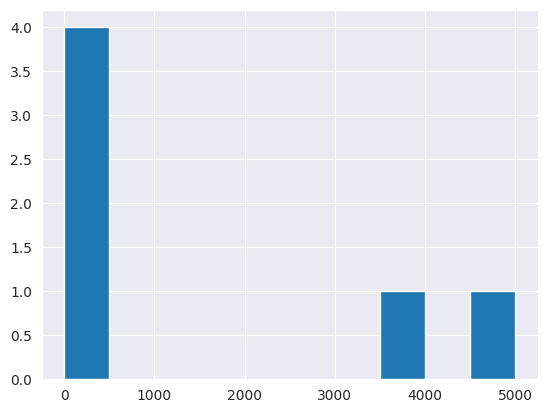

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(high_var_array)
plt.show()

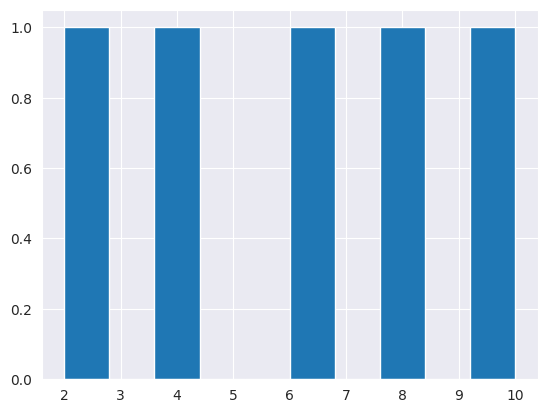

In [68]:
plt.hist(low_var_array)
plt.show()

### Reshaping

In [69]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [70]:
a2.shape

(2, 3)

In [71]:
a2 + a3

ValueError: operands could not be broadcast together with shapes (2,3) (2,3,3) 

In [ ]:
a2.reshape(2, 3, 1)

In [ ]:
a2.reshape(2, 3, 1) + a3

### Transpose

A transpose reverses the order of the axes. 

For example, an array with shape `(2, 3)` becomes `(3, 2)`.

In [ ]:
a2.shape

In [ ]:
a2.T

In [ ]:
a2.transpose()

In [ ]:
a2.T.shape

For larger arrays, the default value of a transpose is to swap the first and last axes.

For example, `(5, 3, 3)` -> `(3, 3, 5)`. 

In [ ]:
matrix = np.random.random(size=(5, 3, 3))
matrix

In [ ]:
matrix.shape

In [ ]:
matrix.T

In [ ]:
matrix.T.shape

In [ ]:
# Check to see if the reverse shape is same as transpose shape
matrix.T.shape == matrix.shape[::-1]

In [ ]:
# Check to see if the first and last axes are swapped
matrix.T == matrix.swapaxes(0, -1) # swap first (0) and last (-1) axes

You can see more advanced forms of tranposing in the NumPy documentation under [`numpy.transpose`](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html).

### Dot product

The main two rules for dot product to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
  
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`
 
**Note:** In NumPy, `np.dot()` and `@` can be used to achieve the same result for 1-2 dimension arrays. However, their behaviour begins to differ at arrays with 3+ dimensions.

In [ ]:
np.random.seed(0)
mat1 = np.random.randint(10, size=(3, 3))
mat2 = np.random.randint(10, size=(3, 2))

mat1.shape, mat2.shape

In [ ]:
mat1

In [ ]:
mat2

In [ ]:
np.dot(mat1, mat2)

In [ ]:
# Can also achieve np.dot() with "@" 
# (however, they may behave differently at 3D+ arrays)
mat1 @ mat2

In [ ]:
np.random.seed(0)
mat3 = np.random.randint(10, size=(4,3))
mat4 = np.random.randint(10, size=(4,3))
mat3

In [ ]:
mat4

In [ ]:
# This will fail as the inner dimensions of the matrices do not match
np.dot(mat3, mat4)

In [ ]:
mat3.T.shape

In [ ]:
# Dot product
np.dot(mat3.T, mat4)

In [ ]:
# Element-wise multiplication, also known as Hadamard product
mat3 * mat4

### Dot product practical example, nut butter sales

In [ ]:
np.random.seed(0)
sales_amounts = np.random.randint(20, size=(5, 3))
sales_amounts

In [ ]:
weekly_sales = pd.DataFrame(sales_amounts,
                            index=["Mon", "Tues", "Wed", "Thurs", "Fri"],
                            columns=["Almond butter", "Peanut butter", "Cashew butter"])
weekly_sales

In [ ]:
prices = np.array([10, 8, 12])
prices

In [ ]:
butter_prices = pd.DataFrame(prices.reshape(1, 3),
                             index=["Price"],
                             columns=["Almond butter", "Peanut butter", "Cashew butter"])
butter_prices.shape

In [ ]:
weekly_sales.shape

In [ ]:
# Find the total amount of sales for a whole day
total_sales = prices.dot(sales_amounts)
total_sales

The shapes aren't aligned, we need the middle two numbers to be the same.

In [ ]:
prices

In [ ]:
sales_amounts.T.shape

In [ ]:
# To make the middle numbers the same, we can transpose
total_sales = prices.dot(sales_amounts.T)
total_sales

In [ ]:
butter_prices.shape, weekly_sales.shape

In [ ]:
daily_sales = butter_prices.dot(weekly_sales.T)
daily_sales

In [ ]:
# Need to transpose again
weekly_sales["Total"] = daily_sales.T
weekly_sales

### Comparison operators 

Finding out if one array is larger, smaller or equal to another.

In [ ]:
a1

In [ ]:
a2

In [ ]:
a1 > a2

In [ ]:
a1 >= a2

In [ ]:
a1 > 5

In [ ]:
a1 == a1

In [ ]:
a1 == a2

## 5. Sorting arrays

* [`np.sort()`](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) - sort values in a specified dimension of an array.
* [`np.argsort()`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) - return the indices to sort the array on a given axis.
* [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) - return the index/indicies which gives the highest value(s) along an axis.
* [`np.argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) - return the index/indices which gives the lowest value(s) along an axis.

In [ ]:
random_array

In [ ]:
np.sort(random_array)

In [ ]:
np.argsort(random_array)

In [ ]:
a1

In [ ]:
# Return the indices that would sort an array
np.argsort(a1)

In [ ]:
# No axis
np.argmin(a1)

In [ ]:
random_array

In [ ]:
# Down the vertical
np.argmax(random_array, axis=1)

In [ ]:
# Across the horizontal
np.argmin(random_array, axis=0)

## 6. Use case

Turning an image into a NumPy array.

Why?

Because computers can use the numbers in the NumPy array to find patterns in the image and in turn use those patterns to figure out what's in the image.

This is what happens in modern computer vision algorithms.

Let's start with this beautiful image of a panda:

<img src="../images/numpy-panda.jpeg" alt="photo of a panda waving" width=450/>

In [ ]:
from matplotlib.image import imread

panda = imread('../images/numpy-panda.jpeg')
print(type(panda))

In [ ]:
panda.shape

In [ ]:
panda

<img src="../images/numpy-car-photo.png" alt="photo of a car"/>

In [ ]:
car = imread("../images/numpy-car-photo.png")
car.shape

In [ ]:
car[:,:,:3].shape

<img src="../images/numpy-dog-photo.png" alt="photo a dog"/>

In [ ]:
dog = imread("../images/numpy-dog-photo.png")
dog.shape

In [ ]:
dog